In [37]:
import plotly.express as px
import pandas as pd
from tqdm import tqdm
import os

from pyubx2 import UBXReader

In [63]:
#fn = "2023_02_24_22_21_58.ubx"

#fn = "test_traces/"+fn
#fn = "/Users/anish/projects/embedded/cmubuggy-datalogger-datasets/2023_03_24_17_48_05_spintocampus_newhw.ubx"

fn = "/Users/anish/Desktop/cia-0408/third-filtered/combined.ubx"

msgs = []
with tqdm(total=os.path.getsize(fn)) as pbar:
    with open(fn, "rb") as stream:
        offs = 0
        ubr = UBXReader(stream, protfilter=2)
        for x in tqdm(ubr):
            msgs.append(x[1])
            pbar.update(stream.tell() - offs)
            offs = stream.tell()

print(len(msgs))

 96%|█████████████████████████████████████████████████████████▋  | 3196668/3326320 [00:04<00:00, 771658.99it/s]
5602it [00:04, 1261.56it/s]█████████████████████████████████████ | 3275464/3326320 [00:04<00:00, 770932.17it/s]
100%|████████████████████████████████████████████████████████████| 3326320/3326320 [00:04<00:00, 748828.61it/s]

5602


In [64]:
set([x.identity for x in msgs])

{'NAV-PVT', 'RXM-RAWX', 'RXM-SFRBX'}

In [65]:
out = []
out += [{"timestamp": x.hour*60*60 + x.min*60 + x.second + x.nano*1e-9,
         "timestamp_str": f"{x.year:04d}_{x.month:02d}_{x.day:02d}_{x.hour:02d}_{x.min:02d}_{x.second:02d}",
         "rtktype": x.carrSoln,
         "latitude": x.lat,
         "longitude": x.lon,
         "ground_speed": x.gSpeed*0.00223694, # mph
         "altitude": x.hMSL / 1000, # meters
         "horizontal_accuracy": x.hAcc / 1000,
         "vertical_accuracy": x.vAcc / 1000,
         "speed_accuracy": x.sAcc*0.00223694,
         "msg_num": i
        } for i, x in enumerate(msgs) if x.identity=="NAV-PVT" and x.hAcc < 10000]# and x.carrSoln in (1, 2)]

df = pd.DataFrame.from_dict(out)

In [66]:
df

,timestamp,timestamp_str,rtktype,latitude,longitude,ground_speed,altitude,horizontal_accuracy,vertical_accuracy,speed_accuracy,msg_num
0,45618.499793,2023_04_08_12_40_18,0,40.441648,-79.941627,0.038028,288.741,0.277,0.417,0.145401,1
1,45618.599793,2023_04_08_12_40_18,0,40.441648,-79.941627,0.026843,288.728,0.277,0.417,0.152112,3
2,45618.699793,2023_04_08_12_40_18,0,40.441648,-79.941627,0.080530,288.721,0.277,0.416,0.140927,5
3,45618.799793,2023_04_08_12_40_18,0,40.441648,-79.941627,0.013422,288.712,0.276,0.416,0.147638,7
4,45618.899793,2023_04_08_12_40_18,0,40.441648,-79.941627,0.031317,288.706,0.276,0.416,0.118558,9
...,...,...,...,...,...,...,...,...,...,...,...
1773,45797.799785,2023_04_08_12_43_17,0,40.440550,-79.942334,0.085004,293.458,0.239,0.384,0.131979,5563
1774,45797.899785,2023_04_08_12_43_17,0,40.440550,-79.942334,0.111847,293.458,0.239,0.384,0.118558,5565
1775,45797.999785,2023_04_08_12_43_18,0,40.440550,-79.942334,0.076056,293.454,0.239,0.384,0.120795,5567
1776,45798.099785,2023_04_08_12_43_18,0,40.440550,-79.942334,0.085004,293.448,0.239,0.384,0.147638,5598


In [67]:
df.to_csv(fn.replace(".ubx", "-lowaccuracy.csv"))

In [68]:
ll = list(df["timestamp"])
oo = []
for i in range(len(ll)-1):
    oo.append(round(ll[i+1]-ll[i], 2))
    
print({x: oo.count(x) for x in set(oo)})

{0.1: 1757, 0.2: 20}


In [69]:
layers = [
    {
        "below": "traces",
        "sourcetype": "raster",
        "source": [
            "https://imagery.pasda.psu.edu/arcgis/rest/services/pasda/PEMAImagery2018_2020/MapServer/WMTS/tile/1.0.0/pasda_PEMAImagery2018_2020/default/default028mm/{z}/{y}/{x}.png"
        ]
    }
]

fig = px.scatter_mapbox(df,
                        lat="latitude", lon="longitude",
                        color="ground_speed",
                        hover_data=["horizontal_accuracy",
                                    "speed_accuracy",
                                    "altitude",
                                    "timestamp",
                                    "timestamp_str",
                                    "msg_num"],
                        zoom=15, size_max=18,
                        height=400, width=800)

fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=layers
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [70]:
fig.write_html(fn.replace(".ubx", "-lowaccuracy.html"))

In [54]:
import shutil

In [148]:
print(fn)

test_traces/2023_02_24_13_55_50.ubx


In [26]:
"""name = "pvtonly" + "_" + "scooter_northoakland"
oo = fn.replace("test_traces/", "test_traces/out1/").replace(".ubx", "")+"_"+name
shutil.copy(fn, oo+".ubx")
df.to_csv(oo+".csv")
fig.write_html(oo+".html")"""

NameError: name 'shutil' is not defined

In [33]:
import seaborn as sns

<AxesSubplot:xlabel='timestamp', ylabel='fixtype'>

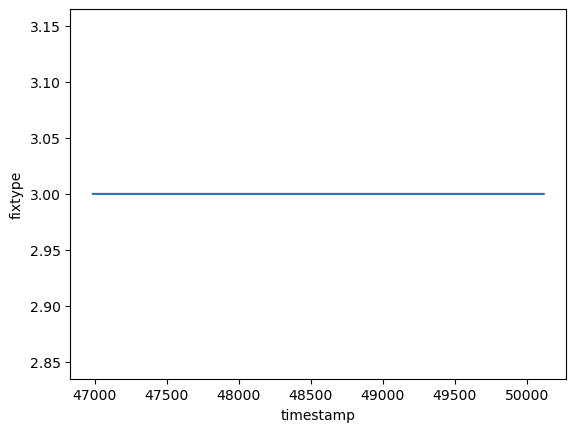

In [43]:
sns.lineplot(data=df, x="timestamp", y="fixtype")